<a href="https://colab.research.google.com/github/mmoran90/death-classification/blob/main/2Final_Project_Working_Document.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Katie Mears - Final Project
Reclassifying Undetermined Deaths
EDA

### Load Packages

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Read Data and Explore Variables

In [4]:
# Read in the 2015_data
death_data = pd.read_csv('2015_data.csv')
# Display the first few rows of the data
print(death_data.head())

   resident_status  education_1989_revision  education_2003_revision  \
0                1                      NaN                      3.0   
1                1                      NaN                      6.0   
2                1                      NaN                      3.0   
3                1                      NaN                      3.0   
4                1                      NaN                      5.0   

   education_reporting_flag  month_of_death sex  detail_age_type  detail_age  \
0                         1               1   M                1          84   
1                         1               1   M                1          70   
2                         1               1   F                1          91   
3                         1               1   F                1          40   
4                         1               1   F                1          89   

   age_substitution_flag  age_recode_52  ...  record_condition_18  \
0                

<ipython-input-4-706664e4080e>:2: DtypeWarning: Columns (41,42,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  death_data = pd.read_csv('2015_data.csv')


In [5]:
# Print Column Titles in Original Data Set
column_titles = death_data.columns
print(column_titles)

Index(['resident_status', 'education_1989_revision', 'education_2003_revision',
       'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type',
       'detail_age', 'age_substitution_flag', 'age_recode_52', 'age_recode_27',
       'age_recode_12', 'infant_age_recode_22',
       'place_of_death_and_decedents_status', 'marital_status',
       'day_of_week_of_death', 'current_data_year', 'injury_at_work',
       'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code',
       'place_of_injury_for_causes_w00_y34_except_y06_and_y07_',
       'icd_code_10th_revision', '358_cause_recode', '113_cause_recode',
       '130_infant_cause_recode', '39_cause_recode',
       'number_of_entity_axis_conditions', 'entity_condition_1',
       'entity_condition_2', 'entity_condition_3', 'entity_condition_4',
       'entity_condition_5', 'entity_condition_6', 'entity_condition_7',
       'entity_condition_8', 'entity_condition_9', 'entity_condition_10',
       'entity_condition

In [6]:
# Data Description of Original data set (2015_data.csv)
data_description_all = death_data.describe(include='all')
print(data_description_all)

        resident_status  education_1989_revision  education_2003_revision  \
count     101914.000000             50870.000000             51044.000000   
unique              NaN                      NaN                      NaN   
top                 NaN                      NaN                      NaN   
freq                NaN                      NaN                      NaN   
mean           1.233275                12.522607                 3.458741   
std            0.498072                 8.844328                 1.744915   
min            1.000000                 0.000000                 1.000000   
25%            1.000000                11.000000                 3.000000   
50%            1.000000                12.000000                 3.000000   
75%            1.000000                14.000000                 4.000000   
max            4.000000                99.000000                 9.000000   

        education_reporting_flag  month_of_death     sex  detail_age_type  

In [7]:
# Convert manner_of_death to homicide or not homicide
death_data['manner_of_death'] = death_data['manner_of_death'].replace([1, 2, 4, 5, 6, 7, None],0)
death_data['manner_of_death'] = death_data['manner_of_death'].replace([3],1)

### Missing Data

In [8]:
# Print Missing Values per Column
missing_values_count = death_data.isnull().sum()
print(missing_values_count)

resident_status                    0
education_1989_revision        51044
education_2003_revision        50870
education_reporting_flag           0
month_of_death                     0
                               ...  
race_imputation_flag          101359
race_recode_3                      1
race_recode_5                      1
hispanic_origin                    1
hispanic_originrace_recode         1
Length: 77, dtype: int64


In [9]:
# Print Missing Data as percentage (per column)
total_rows = death_data.shape[0]
percent_missing = (missing_values_count / total_rows) * 100
print(percent_missing)

resident_status                0.000000
education_1989_revision       50.085366
education_2003_revision       49.914634
education_reporting_flag       0.000000
month_of_death                 0.000000
                                ...    
race_imputation_flag          99.455423
race_recode_3                  0.000981
race_recode_5                  0.000981
hispanic_origin                0.000981
hispanic_originrace_recode     0.000981
Length: 77, dtype: float64


In [10]:
total_missing_values = death_data.isnull().sum().sum()
total_elements = death_data.size
total_percent_missing = (total_missing_values / total_elements) * 100
print("Total percentage of missing data in the dataset: {:.2f}%".format(total_percent_missing))

Total percentage of missing data in the dataset: 55.19%


In [11]:
# Isolate the Desired Columns
desired_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status',
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death', 'method_of_disposition',
                   'autopsy', 'race','detail_age']
new_death = death_data[desired_columns]

# List of column names to convert to categorical
categorical_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status',
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death',
                   'method_of_disposition', 'autopsy', 'race']

# Convert the selected columns to categorical
new_death[categorical_columns] = new_death[categorical_columns].astype('category')
print(new_death.head())

  education_2003_revision month_of_death sex  \
0                     3.0              1   M   
1                     6.0              1   M   
2                     3.0              1   F   
3                     3.0              1   F   
4                     5.0              1   F   

  place_of_death_and_decedents_status marital_status day_of_week_of_death  \
0                                   1              M                    1   
1                                   1              M                    2   
2                                   4              W                    6   
3                                   4              S                    5   
4                                   6              W                    5   

  injury_at_work manner_of_death method_of_disposition autopsy race  \
0              U             0.0                     B       N  1.0   
1              U             0.0                     C       N  1.0   
2              U             0.0   

<ipython-input-11-92631ee252d4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_death[categorical_columns] = new_death[categorical_columns].astype('category')


In [12]:
# Get the data types for all columns
data_types = new_death.dtypes

print(data_types)

education_2003_revision                category
month_of_death                         category
sex                                    category
place_of_death_and_decedents_status    category
marital_status                         category
day_of_week_of_death                   category
injury_at_work                         category
manner_of_death                        category
method_of_disposition                  category
autopsy                                category
race                                   category
detail_age                                int64
dtype: object


In [13]:
total_missing_values2 = new_death.isnull().sum().sum()
total_elements2 = new_death.size
total_percent_missing2 = (total_missing_values2 / total_elements2) * 100
print("Total percentage of missing data in the sample dataset: {:.2f}%".format(total_percent_missing2))

Total percentage of missing data in the sample dataset: 4.36%


In [14]:
# Drop rows with missing values
death_dropped = new_death.dropna()

In [15]:
total_missing_values3 = death_dropped.isnull().sum().sum()
total_elements3 = death_dropped.size
total_percent_missing3 = (total_missing_values3 / total_elements3) * 100
print("Total percentage of missing data in the sample dataset: {:.2f}%".format(total_percent_missing3))

Total percentage of missing data in the sample dataset: 0.00%


In [16]:
summary_stats = death_dropped.describe()
print(summary_stats)

         detail_age
count  51043.000000
mean      71.811962
std       19.883707
min        1.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      999.000000


### Random Sample

In [17]:
import random
import numpy as np

In [18]:
# Perform random sampling
sampled_df = death_dropped.sample(frac=0.3, random_state=1)
print('Number of rows after random sampling = %d' % (sampled_df.shape[0]))

Number of rows after random sampling = 15313


In [19]:
# Value Counts for each Categorical Variable
education_counts = sampled_df['education_2003_revision'].value_counts()
print("education_2003_revision Frequency:")
print(education_counts)

month_of_death_counts = sampled_df['month_of_death'].value_counts()
print("month_of_death Frequency:")
print(month_of_death_counts)

sex_counts = sampled_df['sex'].value_counts()
print("sex Frequency:")
print(sex_counts)

place_of_death_and_decedents_status_counts = sampled_df['place_of_death_and_decedents_status'].value_counts()
print("place_of_death_and_decedents_status Frequency:")
print(place_of_death_and_decedents_status_counts)

marital_status_counts = sampled_df['marital_status'].value_counts()
print("marital_status Frequency:")
print(marital_status_counts)

day_of_week_of_death_counts = sampled_df['day_of_week_of_death'].value_counts()
print("day_of_week_of_death Frequency:")
print(day_of_week_of_death_counts)

injury_at_work_counts = sampled_df['injury_at_work'].value_counts()
print("injury_at_work Frequency:")
print(injury_at_work_counts)

manner_of_death_counts = sampled_df['manner_of_death'].value_counts()
print("manner_of_death Frequency:")
print(manner_of_death_counts)

method_of_disposition_counts = sampled_df['method_of_disposition'].value_counts()
print("method_of_disposition Frequency:")
print(method_of_disposition_counts)

autopsy_counts = sampled_df['autopsy'].value_counts()
print("autopsy Frequency:")
print(autopsy_counts)

race_counts = sampled_df['race'].value_counts()
print("race Frequency:")
print(race_counts)


education_2003_revision Frequency:
3.0    6141
4.0    2165
2.0    1874
1.0    1849
6.0    1326
5.0     917
7.0     572
9.0     252
8.0     217
Name: education_2003_revision, dtype: int64
month_of_death Frequency:
1     2600
3     2386
2     2232
4     1337
5      884
8      881
10     872
12     855
11     831
6      820
7      808
9      807
Name: month_of_death, dtype: int64
sex Frequency:
M    8046
F    7267
Name: sex, dtype: int64
place_of_death_and_decedents_status Frequency:
4    4662
1    4151
6    2248
5    1894
7    1174
2    1151
3      33
9       0
Name: place_of_death_and_decedents_status, dtype: int64
marital_status Frequency:
M    5954
W    4832
D    2730
S    1695
U     102
Name: marital_status, dtype: int64
day_of_week_of_death Frequency:
7    2275
2    2232
5    2216
4    2183
1    2162
6    2154
3    2091
Name: day_of_week_of_death, dtype: int64
injury_at_work Frequency:
U    13937
N     1346
Y       30
Name: injury_at_work, dtype: int64
manner_of_death Frequency:
0.0

### Remove Outliers

In [20]:
# Compute z-score for every data point in detail_age
sampled_df['z_detail_age'] = (sampled_df['detail_age']-sampled_df['detail_age'].mean())/sampled_df['detail_age'].std()
print('Number of rows before discarding outliers = %d' % (sampled_df.shape[0]))

# Removes rows with a zscore beyond 3 or -3
sampled_df = sampled_df[(sampled_df['z_detail_age'] <= 3) & (sampled_df['z_detail_age'] >= -3)]
print('Number of rows after discarding missing values = %d' % (sampled_df.shape[0]))

# Drop the 'C' column
column_name = 'z_detail_age'
sampled_df.drop(column_name, axis=1, inplace=True)

Number of rows before discarding outliers = 15313
Number of rows after discarding missing values = 15138


<ipython-input-20-c14516b41af4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df.drop(column_name, axis=1, inplace=True)


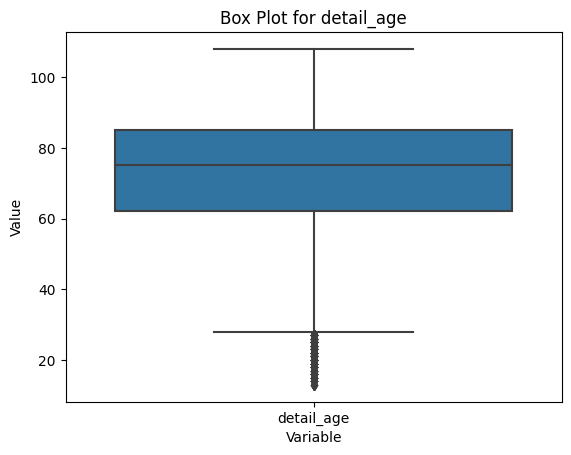

In [21]:
# Non-Normalized Sample
sns.boxplot(data=sampled_df[['detail_age']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title("Box Plot for detail_age")
plt.show()

### Normalize Data and Encode Categorical Variables

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Normalize detail_age using Min-Max scaler
mms = MinMaxScaler()
sampled_df[['detail_age']] = mms.fit_transform(sampled_df[['detail_age']])

In [24]:
# Perform one-hot encoding on categorical columns
encoded_df = pd.get_dummies(sampled_df, columns=['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'injury_at_work','method_of_disposition', 'autopsy', 'race'],
                            prefix=['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'injury_at_work','method_of_disposition', 'autopsy', 'race'])

### Class Imbalances

In [25]:
# Calculate class proportions
class_proportions = encoded_df['manner_of_death'].value_counts(normalize=True)

print(class_proportions)

0.0    0.992535
1.0    0.007465
Name: manner_of_death, dtype: float64


In [26]:
# Split data for rebalancing
train, test = train_test_split(encoded_df, test_size=0.3, random_state=42)

In [27]:
# Identify current proportion of homicide records
total = train.shape[0]
print('\nTotal number of instances in train sample: ', total)

homicide = train['manner_of_death'].value_counts()[1]
print('\nTotal number of homicide instances in train sample: ', homicide)

# Calculate number to resample
x = ((0.2 * total) - homicide) / 0.8
print('\nNumber of homicide records to resample: ', int(x))

# Resample data to increase number of homicide records
to_resample = train.loc[train['manner_of_death'] == 1]
our_resample = to_resample.sample(n = int(x), replace = True)
encoded_df_rebal = pd.concat([train, our_resample])
encoded_df_rebal['manner_of_death'].value_counts()

# Check percentage is met
ratio = encoded_df_rebal['manner_of_death'].value_counts()[1] / encoded_df_rebal.shape[0] * 100
print('\nNew percent of homicide records: ', round(ratio, 0))


Total number of instances in train sample:  10596

Total number of homicide instances in train sample:  80

Number of homicide records to resample:  2549

New percent of homicide records:  20.0


### Column Distributions

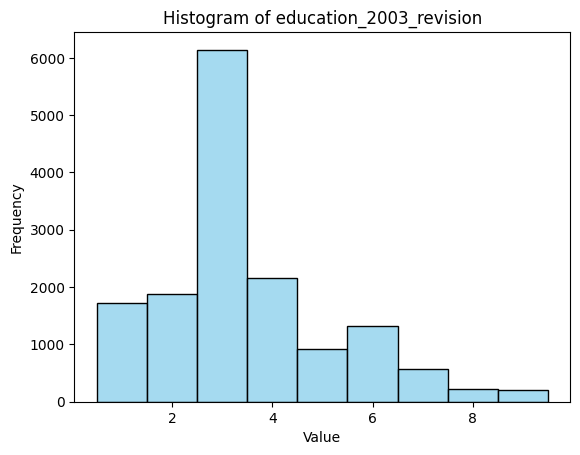

In [28]:
education_2003_revision  = sampled_df['education_2003_revision']
sns.histplot(education_2003_revision, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of education_2003_revision')
plt.show()

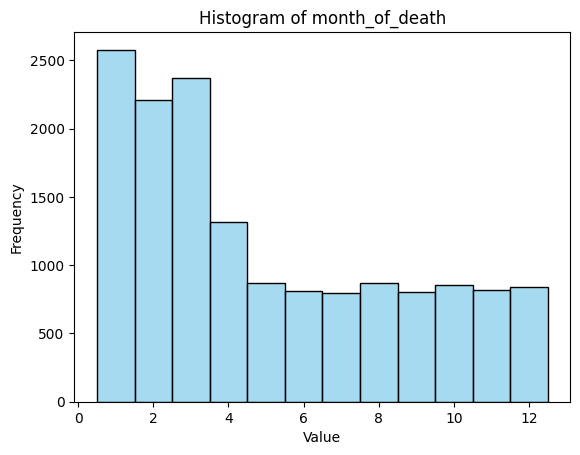

In [29]:
month_of_death = sampled_df['month_of_death']
sns.histplot(month_of_death, bins=12
             , color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of month_of_death')
plt.show()

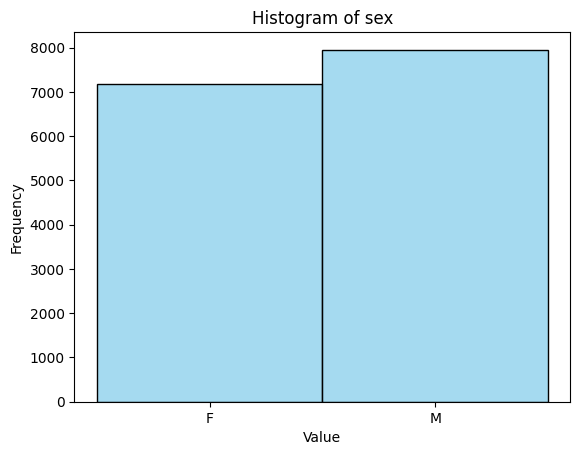

In [30]:
sex = sampled_df['sex']
sns.histplot(sex, bins=2, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of sex')
plt.show()

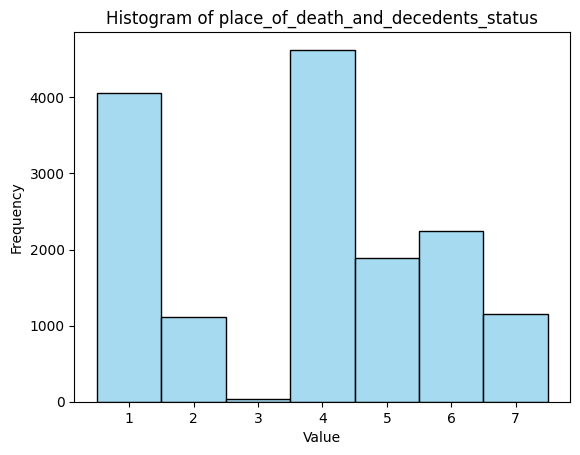

In [31]:
place_of_death_and_decedents_status = sampled_df['place_of_death_and_decedents_status']
sns.histplot(place_of_death_and_decedents_status, bins=9, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of place_of_death_and_decedents_status')
plt.show()

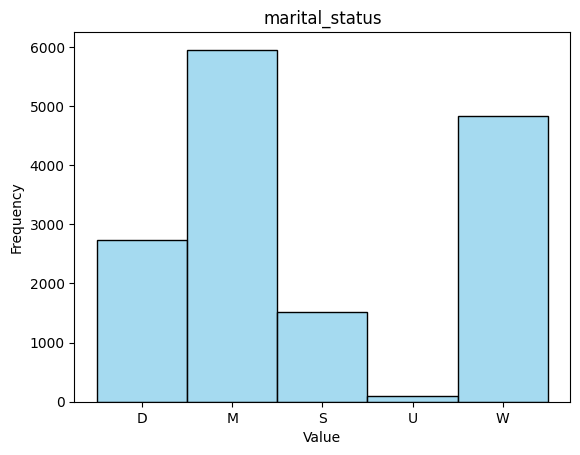

In [32]:
marital_status = sampled_df['marital_status']
sns.histplot(marital_status, bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('marital_status')
plt.show()

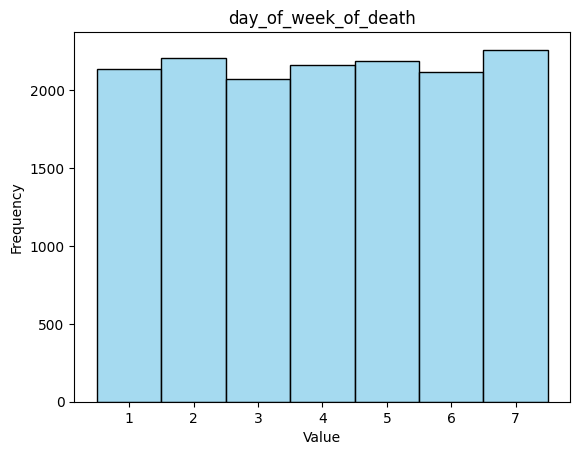

In [33]:
day_of_week_of_death = sampled_df['day_of_week_of_death']
sns.histplot(day_of_week_of_death, bins=8, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('day_of_week_of_death')
plt.show()

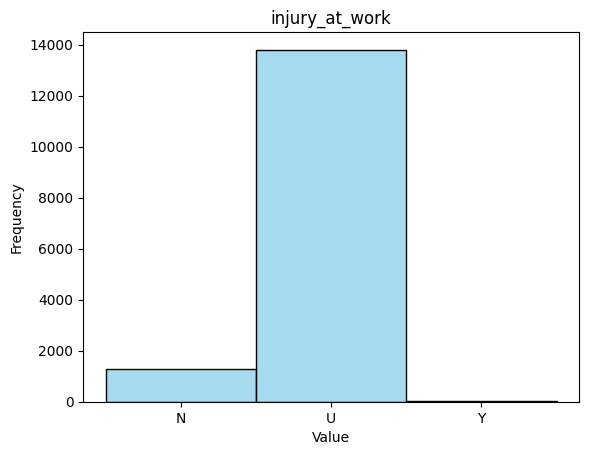

In [34]:
injury_at_work = sampled_df['injury_at_work']
sns.histplot(injury_at_work, bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('injury_at_work')
plt.show()

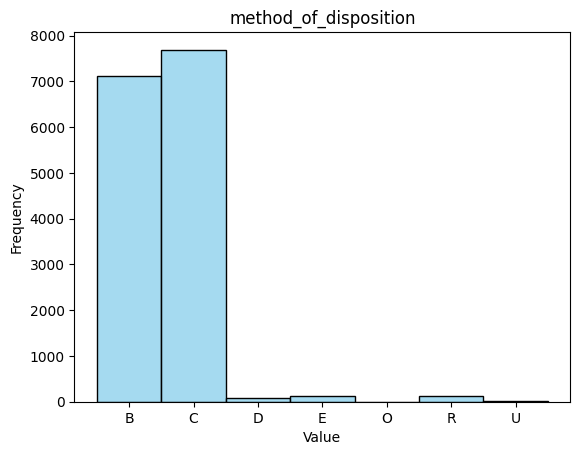

In [35]:
method_of_disposition = sampled_df['method_of_disposition']
sns.histplot(method_of_disposition, bins=7, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('method_of_disposition')
plt.show()

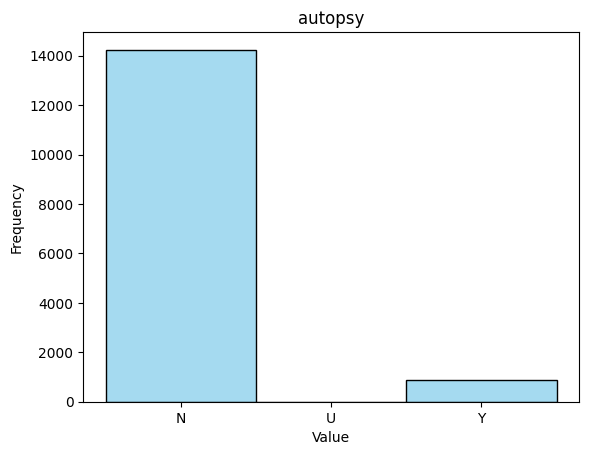

In [36]:
autopsy = sampled_df['autopsy']
sns.histplot(autopsy, bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('autopsy')
plt.show()

In [37]:
icd_code_10th_revision = sampled_df['icd_code_10th_revision']
sns.histplot(icd_code_10th_revision, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('icd_code_10th_revision')
plt.show()

KeyError: ignored

In [ ]:
cause_recode358 = sampled_df['358_cause_recode']
sns.histplot(cause_recode358, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('358_cause_recode')
plt.show()

In [ ]:
cause_recode113 = sampled_df['113_cause_recode']
sns.histplot(cause_recode113, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('113_cause_recode')
plt.show()

In [ ]:
cause_recode39 = sampled_df['39_cause_recode']
sns.histplot(cause_recode39, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('39_cause_recode')
plt.show()

In [ ]:
race = sampled_df['race']
sns.histplot(race, bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('race')
plt.show()

In [ ]:
detail_age = sampled_df['detail_age']
sns.histplot(detail_age, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('detail_age')
plt.show()

In [ ]:
manner_of_death = sampled_df['manner_of_death']
sns.histplot(manner_of_death, bins=7, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('manner_of_death')
plt.show()

### Correlations

In [ ]:
sampled_df = sampled_df.dropna()

In [ ]:
# pip install prince
import prince

In [ ]:
for column in sampled_df.columns:
    sampled_df[column] = pd.Categorical(sampled_df[column]).codes

# Perform MCA
mca = prince.MCA(n_components=16)
mca.fit(sampled_df)

# Access the eigenvalues and calculate the explained variance ratio
eigenvalues = mca.eigenvalues_
total_variance = sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance

# Access the results
print("Eigenvalues:")
print(mca.eigenvalues_)


print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


print("\nPrincipal Coordinates:")
print(mca.row_coordinates(sampled_df))  # Coordinates of rows (observations)
print(mca.column_coordinates(sampled_df))  # Coordinates of columns (categories)


In [ ]:
# Plot MCA results
plt.figure(figsize=(10, 6))
plt.scatter(mca.row_coordinates(sampled_df).iloc[:, 0], mca.row_coordinates(sampled_df).iloc[:, 1], label='Rows')
plt.scatter(mca.column_coordinates(sampled_df).iloc[:, 0], mca.column_coordinates(sampled_df).iloc[:, 1], label='Columns')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('MCA Results')
plt.grid()
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# !pip install pandas scipy
from scipy.stats import chi2_contingency

In [ ]:
# Convert the categorical data to numerical labels (optional if already numeric)
for column in sampled_df.columns:
    sampled_df[column] = pd.Categorical(sampled_df[column]).codes

# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['detail_age'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['race'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['sex'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['autopsy'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['marital_status'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['month_of_death'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['education_2003_revision'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['day_of_week_of_death'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['injury_at_work'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['method_of_disposition'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['injury_at_work'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

In [ ]:
# Plot MCA results
plt.figure(figsize=(10, 6))

# Scatter plot for rows with different colors
row_coords = mca.row_coordinates(sampled_df)
plt.scatter(row_coords.iloc[:, 0], row_coords.iloc[:, 1], c='blue', label='Rows')

# Scatter plot for columns with different colors
column_coords = mca.column_coordinates(sampled_df)
num_categories = column_coords.shape[0]
colors = plt.cm.tab20(np.arange(num_categories))  # Using tab20 colormap with 20 colors
plt.scatter(column_coords.iloc[:, 0], column_coords.iloc[:, 1], c=colors, marker='D', label='Columns')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('MCA Results')
plt.grid()
plt.show()

In [ ]:
# Correlation
# numeric_columns = sampled_df.select_dtypes(include='number')
# death_correlation_matrix = numeric_columns.corr()
# print(death_correlation_matrix)

In [ ]:
# Plot the correlation matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(death_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Death Correlation Matrix')
# plt.show()

# **Data Mining: Artificial Neural Network**

# **ANN Models WITHOUT Data Rebalance**

In [95]:
# import packages
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [39]:
# select features for model
selected_features = [col for col in encoded_df.columns if col != 'manner_of_death']

target_variable = 'manner_of_death'

In [40]:
# select X and y variables
X = encoded_df[selected_features]
y = encoded_df[target_variable]

In [41]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Basic ANN Model withOUT Hidden Layers

In [42]:
# build the ANN model
model_nolay = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# compile the model
model_nolay.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
# train the model
model_nolay.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
332/332 [==============================] - 1s 1ms/step - loss: 0.3566 - accuracy: 0.8907
Epoch 2/10
332/332 [==============================] - 0s 979us/step - loss: 0.0933 - accuracy: 0.9924
Epoch 3/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0567 - accuracy: 0.9924
Epoch 4/10
332/332 [==============================] - 0s 997us/step - loss: 0.0446 - accuracy: 0.9924
Epoch 5/10
332/332 [==============================] - 0s 930us/step - loss: 0.0385 - accuracy: 0.9924
Epoch 6/10
332/332 [==============================] - 0s 981us/step - loss: 0.0347 - accuracy: 0.9924
Epoch 7/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9924
Epoch 8/10
332/332 [==============================] - 0s 962us/step - loss: 0.0295 - accuracy: 0.9924
Epoch 9/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.9924
Epoch 10/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0260 - accura

In [44]:
# evaluate the model
loss_nolay, accuracy_nolay = model_nolay.evaluate(X_test, y_test)
print(f"Test accuracy (Model_nolay): {accuracy_nolay}")

142/142 [==============================] - 0s 900us/step - loss: 0.0258 - accuracy: 0.9927
Test accuracy (Model_nolay): 0.9927344918251038


## Basic ANN Model with Hidden Layers

In [45]:
# build the ANN model --> 3 hidden layers, 64 neurons on 1st, 32 neurons on 2nd, and 1 output neuron on last
model_lay = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_lay.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
# train the ANN model
model_lay.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
332/332 [==============================] - 1s 1ms/step - loss: 0.0591 - accuracy: 0.9834
Epoch 2/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 0.9926
Epoch 3/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9930
Epoch 4/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.9942
Epoch 5/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 0.9941
Epoch 6/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0124 - accuracy: 0.9952
Epoch 7/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0111 - accuracy: 0.9958
Epoch 8/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.9966
Epoch 9/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 0.9970
Epoch 10/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.9975

In [47]:
# evaluate the model
loss_lay, accuracy_lay = model_lay.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy_lay}")

142/142 [==============================] - 0s 1ms/step - loss: 0.0308 - accuracy: 0.9912
Test accuracy: 0.9911932945251465


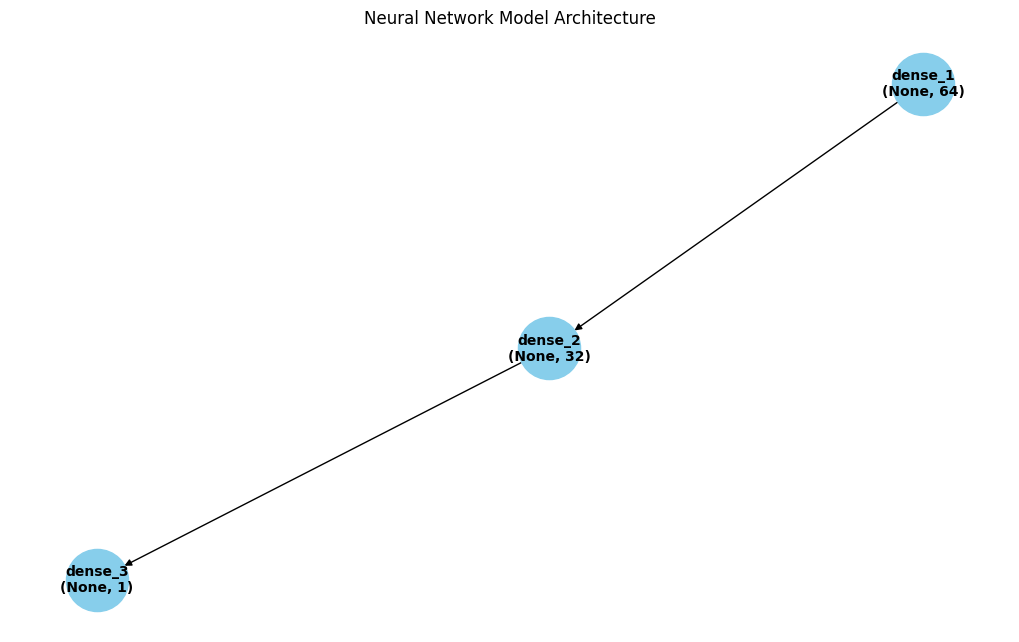

In [48]:
# visualize the ANN model
def visualize_model(model_lay):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model_lay.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture")
    plt.savefig('model_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function to visualize the model
visualize_model(model_lay)

## ANN Model w/ Reduced Complexity (Reduced amount of hidden layers)

In [49]:
# build model with reduced complexity --> 3 hidden layers, 32 neurons on 1st, 16 neurons on 2nd, and 1 output neuron on last
model_red = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile the model
model_red.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# train the model with reduced complexity
model_red.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
332/332 [==============================] - 2s 2ms/step - loss: 0.0600 - accuracy: 0.9924
Epoch 2/10
332/332 [==============================] - 1s 2ms/step - loss: 0.0198 - accuracy: 0.9924
Epoch 3/10
332/332 [==============================] - 1s 3ms/step - loss: 0.0174 - accuracy: 0.9925
Epoch 4/10
332/332 [==============================] - 1s 3ms/step - loss: 0.0163 - accuracy: 0.9932
Epoch 5/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9936
Epoch 6/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.9940
Epoch 7/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0141 - accuracy: 0.9941
Epoch 8/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.9943
Epoch 9/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.9947
Epoch 10/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 0.9955

In [51]:
# evaluate the model with reduced complexity
loss_red, accuracy_red = model_red.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy_red}")

142/142 [==============================] - 0s 916us/step - loss: 0.0264 - accuracy: 0.9921
Test accuracy: 0.9920739531517029


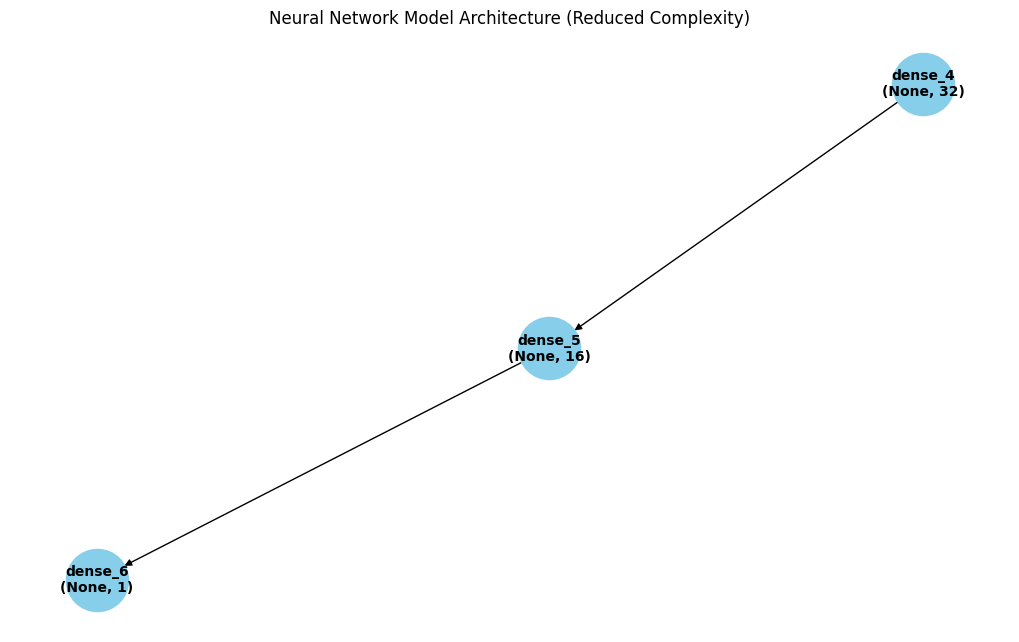

In [52]:
# visualize model with reduced complexity
def visualize_model(model_red):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model_red.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture (Reduced Complexity)")
    plt.savefig('model_red_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# call function to visualize
visualize_model(model_red)

## ANN Model with Regularization

In [53]:
# build ANN the model with minimal hidden layers and dropout regularization (discussed in textbook)
model_reg = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(1, activation='sigmoid')  # Binary classification, hence using 'sigmoid'
])

# Compile the model
model_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
# train model
model_reg.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
332/332 [==============================] - 1s 1ms/step - loss: 0.1115 - accuracy: 0.9880
Epoch 2/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9923
Epoch 3/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 0.9927
Epoch 4/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9929
Epoch 5/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9930
Epoch 6/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9932
Epoch 7/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 0.9935
Epoch 8/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 0.9929
Epoch 9/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9934
Epoch 10/10
332/332 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9933

In [55]:
# evaluate model
loss_reg, accuracy_reg = model_reg.evaluate(X_test, y_test)
print(f"Test accuracy (Model_reg): {accuracy_reg}")

142/142 [==============================] - 0s 884us/step - loss: 0.0224 - accuracy: 0.9930
Test accuracy (Model_reg): 0.992954671382904


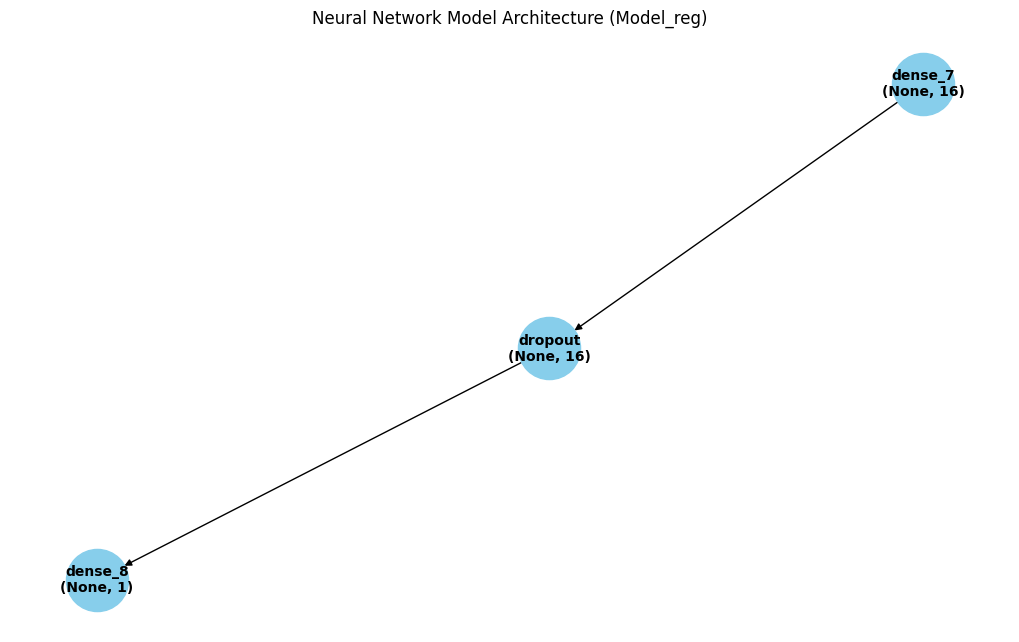

In [56]:
# visualize model with dropout reg
def visualize_model(model):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture (Model_reg)")
    plt.savefig('model_reg_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# call function to visualize
visualize_model(model_reg)

# **ANN Models WITH Data Rebalance**

In [59]:
# select features for model
selected_features = [col for col in encoded_df_rebal.columns if col != 'manner_of_death']

target_variable = 'manner_of_death'

In [60]:
# select X and y variables
X_rebal = encoded_df_rebal[selected_features]
y_rebal = encoded_df_rebal[target_variable]

In [62]:
# split data
X_train_rebal, X_test_rebal, y_train_rebal, y_test_rebal = train_test_split(X_rebal, y_rebal, test_size=0.3, random_state=42)

## Basic ANN Model withOUT Hidden Layers

In [63]:
# build the ANN model
model_nolay_rebal = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(X_train_rebal.shape[1],))
])

# compile the model
model_nolay_rebal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
# train the model
model_nolay_rebal.fit(X_train_rebal, y_train_rebal, epochs=10, batch_size=32)

Epoch 1/10
288/288 [==============================] - 1s 1ms/step - loss: 0.5073 - accuracy: 0.7510
Epoch 2/10
288/288 [==============================] - 0s 1ms/step - loss: 0.2973 - accuracy: 0.8707
Epoch 3/10
288/288 [==============================] - 0s 1000us/step - loss: 0.2153 - accuracy: 0.9250
Epoch 4/10
288/288 [==============================] - 0s 1ms/step - loss: 0.1727 - accuracy: 0.9529
Epoch 5/10
288/288 [==============================] - 0s 1ms/step - loss: 0.1476 - accuracy: 0.9624
Epoch 6/10
288/288 [==============================] - 0s 1ms/step - loss: 0.1314 - accuracy: 0.9651
Epoch 7/10
288/288 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.9655
Epoch 8/10
288/288 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.9677
Epoch 9/10
288/288 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.9680
Epoch 10/10
288/288 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 0.9

In [65]:
# evaluate the model
loss_nolay_rebal, accuracy_nolay_rebal = model_nolay_rebal.evaluate(X_test_rebal, y_test_rebal)
print(f"Test accuracy (Model_nolay): {accuracy_nolay_rebal}")

124/124 [==============================] - 0s 809us/step - loss: 0.0970 - accuracy: 0.9711
Test accuracy (Model_nolay): 0.9710953235626221


# Basic ANN Model with Hidden Layers

In [66]:
# build the ANN model --> 3 hidden layers, 64 neurons on 1st, 32 neurons on 2nd, and 1 output neuron on last
model_lay_rebal = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_rebal.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_lay_rebal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
# train the ANN model
model_lay_rebal.fit(X_train_rebal, y_train_rebal, epochs=10, batch_size=32)

Epoch 1/10
288/288 [==============================] - 1s 1ms/step - loss: 0.1485 - accuracy: 0.9446
Epoch 2/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0591 - accuracy: 0.9792
Epoch 3/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0387 - accuracy: 0.9880
Epoch 4/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.9928
Epoch 5/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0159 - accuracy: 0.9957
Epoch 6/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0102 - accuracy: 0.9971
Epoch 7/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 0.9984
Epoch 8/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 0.9992
Epoch 9/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 10/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000

In [68]:
# evaluate the model
loss_lay_rebal, accuracy_lay_rebal = model_lay.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy_lay_rebal}")

124/124 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.9779
Test accuracy: 0.9779411554336548


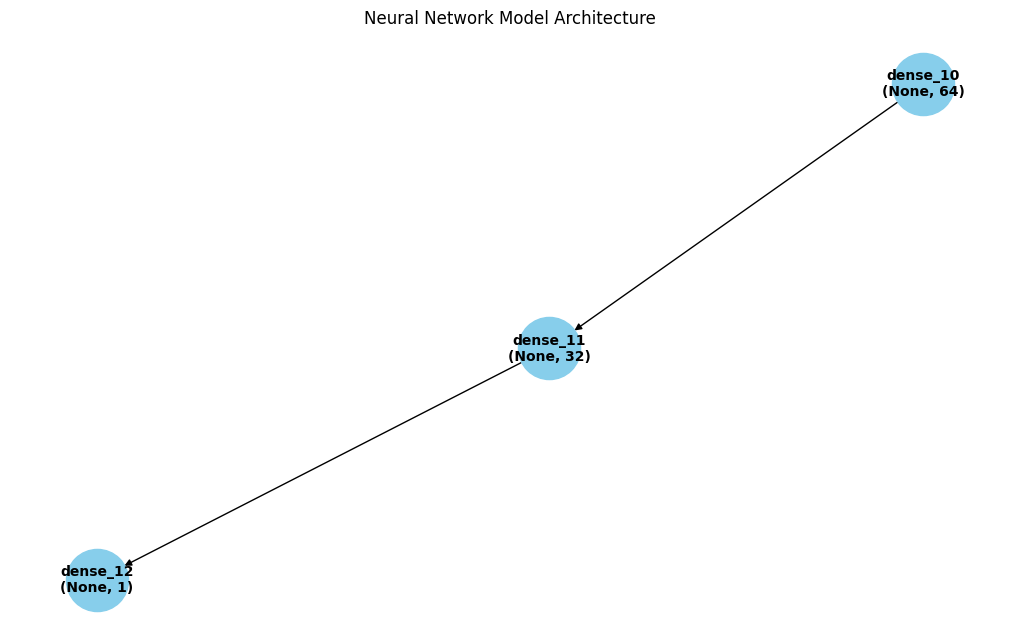

In [69]:
# visualize the ANN model
def visualize_model(model_lay_rebal):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model_lay_rebal.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture")
    plt.savefig('model_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function to visualize the model
visualize_model(model_lay_rebal)

# ANN Model w/ Reduced Complexity (Reduced amount of hidden layers)

In [70]:
# build model with reduced complexity --> 3 hidden layers, 32 neurons on 1st, 16 neurons on 2nd, and 1 output neuron on last
model_red_rebal = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_rebal.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile the model
model_red_rebal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
# train the model with reduced complexity
model_red_rebal.fit(X_train_rebal, y_train_rebal, epochs=10, batch_size=32)

Epoch 1/10
288/288 [==============================] - 1s 1ms/step - loss: 0.1617 - accuracy: 0.9558
Epoch 2/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9783
Epoch 3/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9813
Epoch 4/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 5/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9909
Epoch 6/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9932
Epoch 7/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.9946
Epoch 8/10
288/288 [==============================] - 1s 2ms/step - loss: 0.0140 - accuracy: 0.9962
Epoch 9/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 0.9970
Epoch 10/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 0.9977

In [77]:
# evaluate the model with reduced complexity
loss_red_rebal, accuracy_red_rebal = model_red_rebal.evaluate(X_test_rebal, y_test_rebal)
print(f"Test accuracy: {accuracy_red_rebal}")

124/124 [==============================] - 0s 946us/step - loss: 0.0286 - accuracy: 0.9926
Test accuracy: 0.9926470518112183


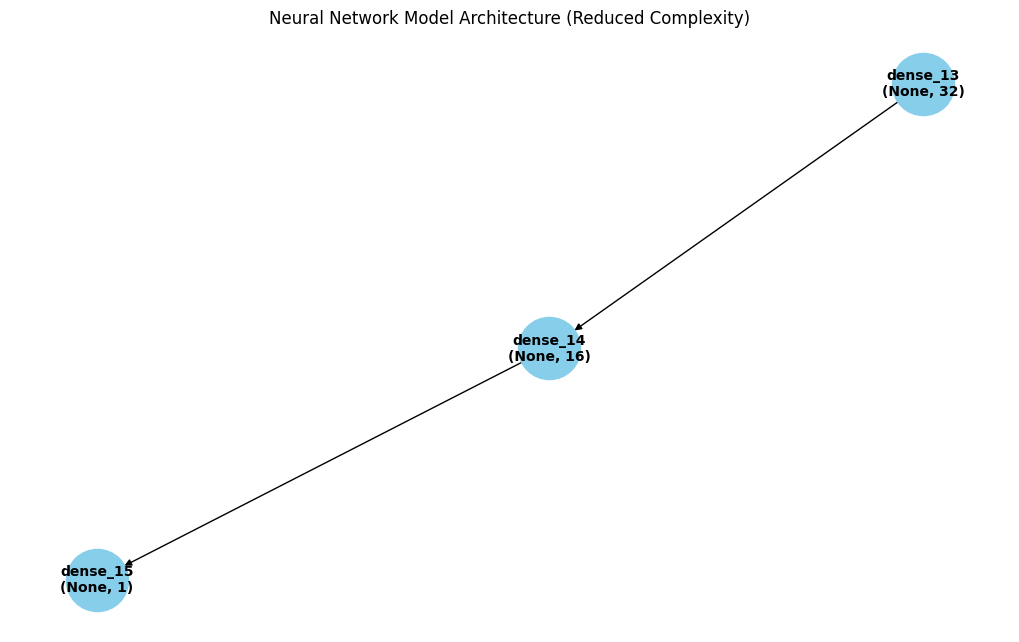

In [73]:
# visualize model with reduced complexity
def visualize_model(model_red_rebal):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model_red_rebal.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture (Reduced Complexity)")
    plt.savefig('model_red_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# call function to visualize
visualize_model(model_red_rebal)

# ANN Model with Regularization

In [74]:
# build ANN the model with minimal hidden layers and dropout regularization (discussed in textbook)
model_reg_rebal = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train_rebal.shape[1],)),
    Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(1, activation='sigmoid')  # Binary classification, hence using 'sigmoid'
])

# Compile the model
model_reg_rebal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
# train model
model_reg_rebal.fit(X_train_rebal, y_train_rebal, epochs=10, batch_size=32)

Epoch 1/10
288/288 [==============================] - 1s 2ms/step - loss: 0.2613 - accuracy: 0.8938
Epoch 2/10
288/288 [==============================] - 0s 1ms/step - loss: 0.1015 - accuracy: 0.9685
Epoch 3/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9725
Epoch 4/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0833 - accuracy: 0.9727
Epoch 5/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9746
Epoch 6/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9754
Epoch 7/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9769
Epoch 8/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0667 - accuracy: 0.9773
Epoch 9/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0640 - accuracy: 0.9795
Epoch 10/10
288/288 [==============================] - 0s 1ms/step - loss: 0.0575 - accuracy: 0.9816

In [76]:
# evaluate model
loss_reg_rebal, accuracy_reg_rebal = model_reg_rebal.evaluate(X_test_rebal, y_test_rebal)
print(f"Test accuracy (Model_reg): {accuracy_reg_rebal}")

124/124 [==============================] - 0s 966us/step - loss: 0.0557 - accuracy: 0.9807
Test accuracy (Model_reg): 0.9807302355766296


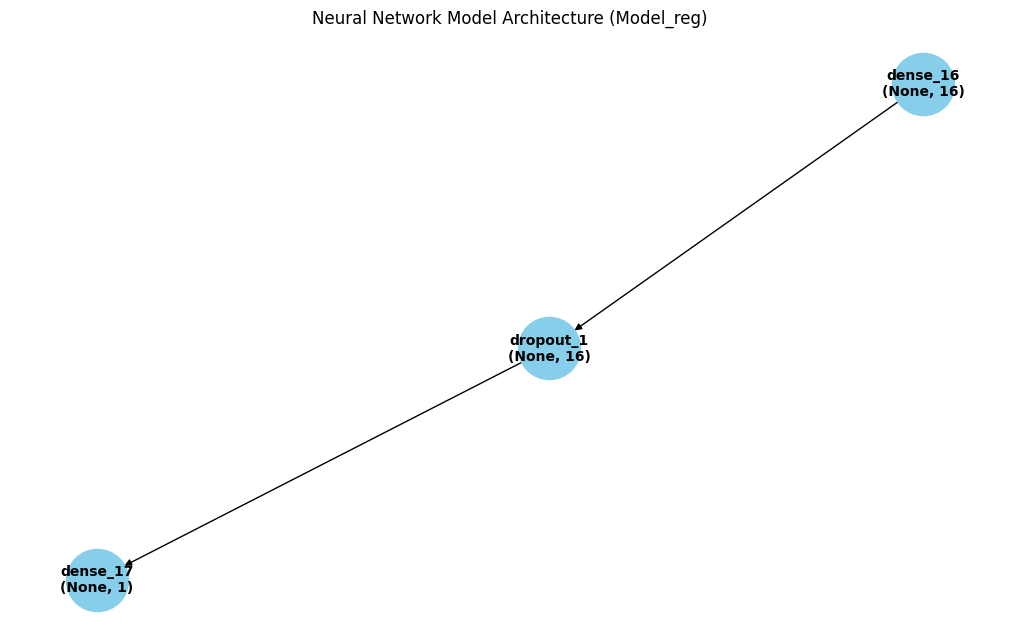

In [78]:
# visualize model with dropout reg
def visualize_model(model_reg_rebal):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model_reg_rebal.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture (Model_reg)")
    plt.savefig('model_reg_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# call function to visualize
visualize_model(model_reg_rebal)

In [81]:
# Predict probabilities for test set
y_probs_reg_rebal = model_reg_rebal.predict(X_test_rebal)

# Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
y_pred_reg_rebal = np.round(y_probs_reg_rebal)

# Calculate precision score
precision_reg_rebal = precision_score(y_test_rebal, y_pred_reg_rebal, average=None)

# Print precision score for positive class (class 1)
print(f"Precision for positive class (Model_reg): {precision_reg_rebal[1]}")

124/124 [==============================] - 0s 800us/step
Precision for positive class (Model_reg): 0.9203980099502488


# **Model Performance Evaluation Summaries**

## Loss & Accuracy Scores

In [57]:
# model eval values for NON-REBALANCED models
eval_results = {
    'Model': ['Model_nolay', 'Model_lay', 'Model_red', 'Model_reg'],
    'Test Loss': [loss_nolay, loss_lay, loss_red, loss_reg],
    'Test Accuracy': [accuracy_nolay, accuracy_lay, accuracy_red, accuracy_reg]
}

# create DataFrame for eval results
eval_df = pd.DataFrame(eval_results)

# Display the table
print(eval_df)


         Model  Test Loss  Test Accuracy
0  Model_nolay   0.025813       0.992734
1    Model_lay   0.030759       0.991193
2    Model_red   0.026387       0.992074
3    Model_reg   0.022442       0.992955


In [79]:
# model eval values for REBALANCED models
eval_results_rebal = {
    'Model': ['Model_nolay_rebal', 'Model_lay_rebal', 'Model_red_rebal', 'Model_reg_rebal'],
    'Test Loss': [loss_nolay_rebal, loss_lay_rebal, loss_red_rebal, loss_reg_rebal],
    'Test Accuracy': [accuracy_nolay_rebal, accuracy_lay_rebal, accuracy_red_rebal, accuracy_reg_rebal]
}

# create DataFrame for eval results
eval_df_rebal = pd.DataFrame(eval_results_rebal)

# Display the table
print(eval_df_rebal)

               Model  Test Loss  Test Accuracy
0  Model_nolay_rebal   0.097044       0.971095
1    Model_lay_rebal   0.062381       0.977941
2    Model_red_rebal   0.028587       0.992647
3    Model_reg_rebal   0.055679       0.980730


## Precision Scores

In [114]:
 # create precision scores for NON-REBALANCED models
models = [model_nolay, model_lay, model_red, model_reg]
model_names = ['model_nolay', 'model_lay', 'model_red', 'model_reg']

precision_scores = {}

for model, name in zip(models, model_names):
    # Predict probabilities for test set
    y_probs = model.predict(X_test)

    # Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
    y_pred = np.round(y_probs)

    # Calculate precision score
    precision = precision_score(y_test, y_pred, average=None)

    # Store precision scores in the dictionary with titles
    precision_scores[name] = {
        "Negative Class": round(precision[0], 6),
        "Positive Class": round(precision[1], 6)
    }

# Print precision scores for each model along with titles for each class
for name, scores in precision_scores.items():
    print(f"Precision scores for {name}:")
    print(f"  Negative Class: {scores['Negative Class']}")
    print(f"  Positive Class: {scores['Positive Class']}")

124/124 [==============================] - 0s 998us/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


124/124 [==============================] - 0s 752us/step
Precision scores for model_nolay:
  Negative Class: 0.809331
  Positive Class: 0.0
Precision scores for model_lay:
  Negative Class: 0.974916
  Positive Class: 0.992593
Precision scores for model_red:
  Negative Class: 0.905762
  Positive Class: 0.997625
Precision scores for model_reg:
  Negative Class: 0.844221
  Positive Class: 1.0


In [111]:
 # create precision scores for REBALANCED models
models_rebal = [model_nolay_rebal, model_lay_rebal, model_red_rebal, model_reg_rebal]
model_names_rebal = ['model_nolay_rebal', 'model_lay_rebal', 'model_red_rebal', 'model_reg_rebal']

precision_scores_rebal = {}

for model, name in zip(models_rebal, model_names_rebal):
    # Predict probabilities for test set
    y_probs_rebal = model.predict(X_test_rebal)

    # Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
    y_pred_rebal = np.round(y_probs_rebal)

    # Calculate precision score
    precision_rebal = precision_score(y_test_rebal, y_pred_rebal, average=None)

    # Store precision scores in the dictionary with titles
    precision_scores_rebal[name] = {
        "Negative Class": round(precision[0], 6),
        "Positive Class": round(precision[1], 6)
    }

# Print precision scores for each model along with titles for each class
for name, scores in precision_scores_rebal.items():
    print(f"Precision scores for {name}:")
    print(f"  Negative Class: {scores['Negative Class']}")
    print(f"  Positive Class: {scores['Positive Class']}")

124/124 [==============================] - 0s 1ms/step
Precision scores for model_nolay_rebal:
  Negative Class: 0.996178
  Positive Class: 0.920398
Precision scores for model_lay_rebal:
  Negative Class: 0.996178
  Positive Class: 0.920398
Precision scores for model_red_rebal:
  Negative Class: 0.996178
  Positive Class: 0.920398
Precision scores for model_reg_rebal:
  Negative Class: 0.996178
  Positive Class: 0.920398


## Recall Scores

In [89]:
 # create recall scores for NON-REBALANCED models
models = [model_nolay, model_lay, model_red, model_reg]
model_names = ['model_nolay', 'model_lay', 'model_red', 'model_reg']

recall_scores = {}

for model, name in zip(models, model_names):
    # Predict probabilities for test set
    y_probs = model.predict(X_test)

    # Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
    y_pred = np.round(y_probs)

    # Calculate recall score
    recall = recall_score(y_test, y_pred, average=None)

    # Store recall scores in the dictionary with titles
    recall_scores[name] = {
        "Negative Class": round(recall[0], 6),
        "Positive Class": round(recall[1], 6)
    }

# Print recall scores for each model along with titles for each class
for name, scores in recall_scores.items():
    print(f"Recall scores for {name}:")
    print(f"  Negative Class: {scores['Negative Class']}")
    print(f"  Positive Class: {scores['Positive Class']}")

124/124 [==============================] - 0s 759us/step
Recall scores for model_nolay:
  Negative Class: 1.0
  Positive Class: 0.0
Recall scores for model_lay:
  Negative Class: 0.998434
  Positive Class: 0.890957
Recall scores for model_red:
  Negative Class: 0.999687
  Positive Class: 0.558511
Recall scores for model_reg:
  Negative Class: 1.0
  Positive Class: 0.216755


In [115]:
 # create recall scores for REBALANCED models
models_rebal = [model_nolay_rebal, model_lay_rebal, model_red_rebal, model_reg_rebal]
model_names_rebal = ['model_nolay_rebal', 'model_lay_rebal', 'model_red_rebal', 'model_reg_rebal']

recall_scores_rebal = {}

for model, name in zip(models_rebal, model_names_rebal):
    # Predict probabilities for test set
    y_probs_rebal = model.predict(X_test_rebal)

    # Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
    y_pred_rebal = np.round(y_probs_rebal)

    # Calculate recall score
    recall_rebal = recall_score(y_test_rebal, y_pred_rebal, average=None)

    # Store recall scores in the dictionary with titles
    recall_scores_rebal[name] = {
        "Negative Class": round(precision[0], 6),
        "Positive Class": round(precision[1], 6)
    }

# Print recall scores for each model along with titles for each class
for name, scores in recall_scores_rebal.items():
    print(f"Recall scores for {name}:")
    print(f"  Negative Class: {scores['Negative Class']}")
    print(f"  Positive Class: {scores['Positive Class']}")

124/124 [==============================] - 0s 746us/step
Recall scores for model_nolay_rebal:
  Negative Class: 0.844221
  Positive Class: 1.0
Recall scores for model_lay_rebal:
  Negative Class: 0.844221
  Positive Class: 1.0
Recall scores for model_red_rebal:
  Negative Class: 0.844221
  Positive Class: 1.0
Recall scores for model_reg_rebal:
  Negative Class: 0.844221
  Positive Class: 1.0


## F1 Scores

In [105]:
 # create F1 scores for NON-REBALANCED models
models = [model_nolay, model_lay, model_red, model_reg]
model_names = ['model_nolay', 'model_lay', 'model_red', 'model_reg']

F1_scores = {}

for model, name in zip(models, model_names):
    # Predict probabilities for test set
    y_probs = model.predict(X_test)

    # Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
    y_pred = np.round(y_probs)

    # Calculate F1 score
    F1 = f1_score(y_test, y_pred, average=None)

    # Store F1 scores in the dictionary with titles
    F1_scores[name] = {
        "Negative Class": round(recall[0], 6),
        "Positive Class": round(recall[1], 6)
    }

# Print F1 scores for each model along with titles for each class
for name, scores in F1_scores.items():
    print(f"F1 scores for {name}:")
    print(f"  Negative Class: {scores['Negative Class']}")
    print(f"  Positive Class: {scores['Positive Class']}")

124/124 [==============================] - 0s 737us/step
F1 scores for model_nolay:
  Negative Class: 0.97995
  Positive Class: 0.984043
F1 scores for model_lay:
  Negative Class: 0.97995
  Positive Class: 0.984043
F1 scores for model_red:
  Negative Class: 0.97995
  Positive Class: 0.984043
F1 scores for model_reg:
  Negative Class: 0.97995
  Positive Class: 0.984043


In [117]:
 # create F1 scores for REBALANCED models
models_rebal = [model_nolay_rebal, model_lay_rebal, model_red_rebal, model_reg_rebal]
model_names_rebal = ['model_nolay_rebal', 'model_lay_rebal', 'model_red_rebal', 'model_reg_rebal']

F1_scores_rebal = {}

for model, name in zip(models_rebal, model_names_rebal):
    # Predict probabilities for test set
    y_probs_rebal = model.predict(X_test_rebal)

    # Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
    y_pred_rebal = np.round(y_probs_rebal)

    # Calculate F1 score
    F1_rebal = f1_score(y_test_rebal, y_pred_rebal, average=None)

    # Store F1 scores in the dictionary with titles
    F1_scores_rebal[name] = {
        "Negative Class": round(precision[0], 6),
        "Positive Class": round(precision[1], 6)
    }

# Print F1 scores for each model along with titles for each class
for name, scores in F1_scores_rebal.items():
    print(f"F1 scores for {name}:")
    print(f"  Negative Class: {scores['Negative Class']}")
    print(f"  Positive Class: {scores['Positive Class']}")

124/124 [==============================] - 0s 763us/step
F1 scores for model_nolay_rebal:
  Negative Class: 0.844221
  Positive Class: 1.0
F1 scores for model_lay_rebal:
  Negative Class: 0.844221
  Positive Class: 1.0
F1 scores for model_red_rebal:
  Negative Class: 0.844221
  Positive Class: 1.0
F1 scores for model_reg_rebal:
  Negative Class: 0.844221
  Positive Class: 1.0


## AUC-ROC Curves

124/124 [==============================] - 0s 796us/step


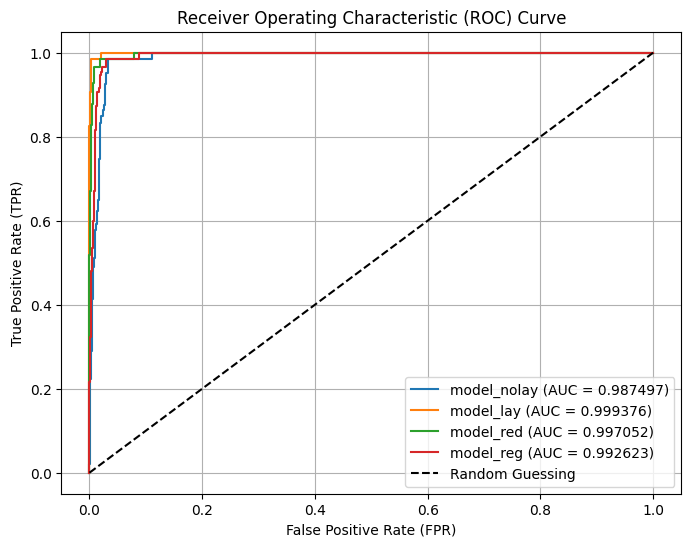

In [101]:
 # calculate and visualize AUC-ROC curve for NON-REBALANCED models
models = [model_nolay, model_lay, model_red, model_reg]
model_names = ['model_nolay', 'model_lay', 'model_red', 'model_reg']

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))

for model, name in zip(models, model_names):
    # Get model predictions
    y_probs = model.predict(X_test)

    # Ensure y_probs is a 1D array (squeeze it if necessary)
    y_probs = np.squeeze(y_probs)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_probs)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {round(auc_score, 6)})")

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

124/124 [==============================] - 0s 912us/step


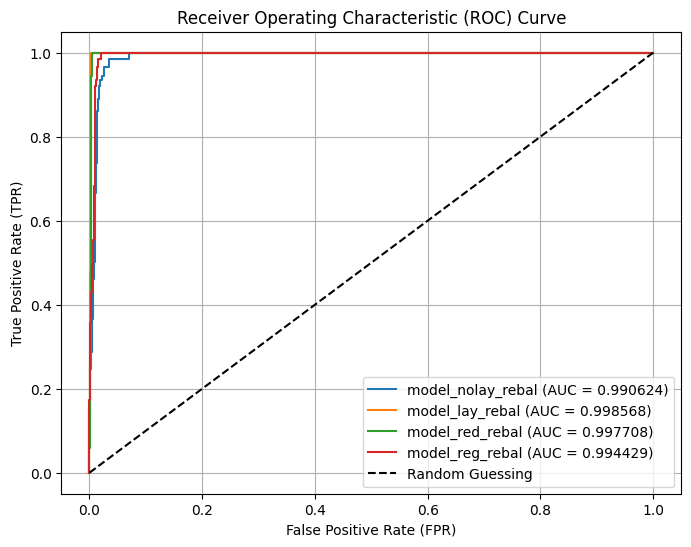

In [102]:
 # calculate and visualize AUC-ROC curve for REBALANCED models
models_rebal = [model_nolay_rebal, model_lay_rebal, model_red_rebal, model_reg_rebal]
model_names_rebal = ['model_nolay_rebal', 'model_lay_rebal', 'model_red_rebal', 'model_reg_rebal']

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))

for model, name in zip(models_rebal, model_names_rebal):
    # Get model predictions
    y_probs_rebal = model.predict(X_test_rebal)

    # Ensure y_probs is a 1D array (squeeze it if necessary)
    y_probs_rebal = np.squeeze(y_probs_rebal)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test_rebal, y_probs_rebal)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_rebal, y_probs_rebal)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {round(auc_score, 6)})")

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()